In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

In [44]:
train_df = pd.read_json(path_or_buf="./data/train.jsonl", lines=True)
test_df = pd.read_json(path_or_buf="./data/test.jsonl", lines=True)
labels = ["sadness", "joy", "love", "anger", "fear", "surprise"]

In [45]:
train_df

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,1
15998,i feel like this was such a rude comment and i...,3


Text(0, 0.5, 'Count')

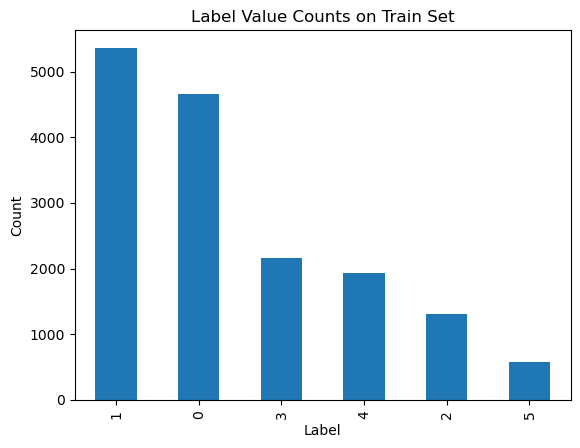

In [46]:
ax = train_df["label"].value_counts().plot(kind='bar', title='Label Value Counts on Train Set')
ax.set_xlabel("Label")
ax.set_ylabel("Count")

In [63]:
train_x = train_df['text'].to_numpy()
train_y = train_df['label'].to_numpy()

sadness = train_df[train_df['label'] == 0 ].to_numpy()
joy = train_df[train_df['label'] == 1 ].to_numpy()
love = train_df[train_df['label'] == 2 ].to_numpy()
anger = train_df[train_df['label'] == 3 ].to_numpy()
fear = train_df[train_df['label'] == 4 ].to_numpy()
surprise = train_df[train_df['label'] == 4 ].to_numpy()

value_counts = train_df['label'].value_counts().sort_index().to_numpy()


print("shape of train inputs: ", train_x.shape)
print("shape of train outputs: ", train_y.shape)
print()
print("label value counts:\n",value_counts)
print()

label_prior_probs = []
for i in range(5):
    prior = value_counts[i] / train_x.shape[0]
    label_prior_probs.append(prior)

print("label prior probabilities:\n",label_prior_probs)

shape of train inputs:  (16000,)
shape of train outputs:  (16000,)

label value counts:
 [4666 5362 1304 2159 1937  572]

label prior probabilities:
 [0.291625, 0.335125, 0.0815, 0.1349375, 0.1210625]


## Extracting Features from Text:
Bag of words model:
- Assign a fixed integer id to each word occurring in any document of the training set (for instance by building a dictionary from words to integer indices).
- For each tweet #i, count the number of occurrences of each word w and store it in X[i, j] as the value of feature #j where j is the index of word w in the dictionary.

Tokenizing text with scikit-learn:
- Text preprocessing, tokenizing and filtering of stopwords are all included in CountVectorizer, which builds a dictionary of features and transforms documents to feature vectors:

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train_x)
X_train_counts.shape

(16000, 15186)

In [32]:
#dict vocabluary: words and counts
#vectorizer has built a dictionary of feature indices
#The index value of a word in the vocabulary is linked to its frequency in the whole training corpus.
from operator import itemgetter
vocab = count_vect.vocabulary_
vocab.get(u'happy')

5988

## From Occurences to Frequencies 

from: https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html


"Occurrence count is a good start but there is an issue: longer documents will have higher average count values than shorter documents, even though they might talk about the same topics.

To avoid these potential discrepancies it suffices to divide the number of occurrences of each word in a document by the total number of words in the document: these new features are called tf for Term Frequencies.

Another refinement on top of tf is to downscale weights for words that occur in many documents in the corpus and are therefore less informative than those that occur only in a smaller portion of the corpus.

This downscaling is called tf–idf for “Term Frequency times Inverse Document Frequency”.

Both tf and tf–idf can be computed as follows using TfidfTransformer:"

In [33]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(16000, 15186)